In [23]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from scipy import interpolate


In [338]:
path_dir = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take"
# file_path = "C:\\Users\\Modern\\Мой диск\\Диссертация\\Data\\Magnetic field data\\Membrane levitating system 2 take\\1mm.dat"


fields_df = pd.DataFrame({'B':[], 'X':[], 'Y':[], 'Z':[]})

for address, dirs, files in os.walk(path_dir):
    for file in files:
        if ".dat" in str(file):
            z = re.search(r'([0-9]+)',file)
            z_coord = z[0]
            file_path = os.path.join(address,file)

            field_i = pd.read_csv(file_path,encoding = 'unicode_escape',delimiter='\t',names= ['B','X','Y'],skiprows=[0])
            field_i['Z'] = int(z_coord)
            # print(z_coord)

            fields_df = pd.concat([fields_df,field_i])
            # print(field_i['B'])



# print(fields_df)
# fields_df['B'].plot()
# plt.show()



In [339]:
fields_res = fields_df[fields_df['B']>1]


fig = px.scatter_3d(fields_df, x='X', y='Y', z='Z', color='B', opacity=0.8, color_continuous_scale='Spectral_r')

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    )
)


fig.update_traces(marker={'size': 2})

fig.show()

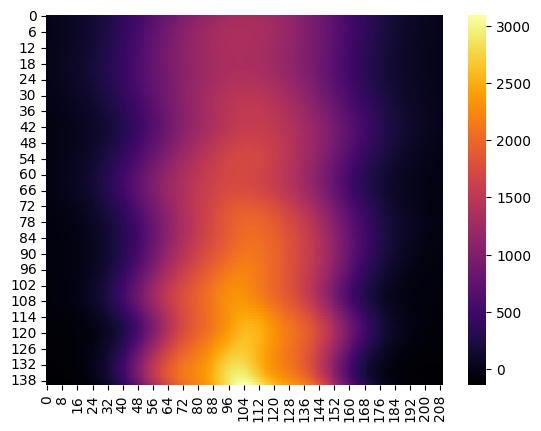

In [336]:
field_flat = fields_df[fields_df['Y']==50].copy()
field_flat_sorted = field_flat.sort_values(by = ['X','Z'])
field_flat_np = field_flat_sorted .to_numpy()
field_flat_square = np.reshape(field_flat_np[:,0],(21,14))

field_flat_square_rot = np.rot90(field_flat_square)


xs = field_flat_sorted['X'].drop_duplicates().to_numpy()
zs = field_flat_sorted['Z'].drop_duplicates().to_numpy()

xs_i = np.linspace(min(xs),max(xs),210)
zs_i = np.linspace(min(zs),max(zs),140)


f = interpolate.interp2d(xs,zs,field_flat_square_rot,kind='cubic')

interpolated_field_square = f(xs_i,zs_i)

plot = sns.heatmap(interpolated_field_square, cmap='inferno')
# x_labels = xs
# plot.set_xticks(range(21))
# plot.set_xticklabels(x_labels)

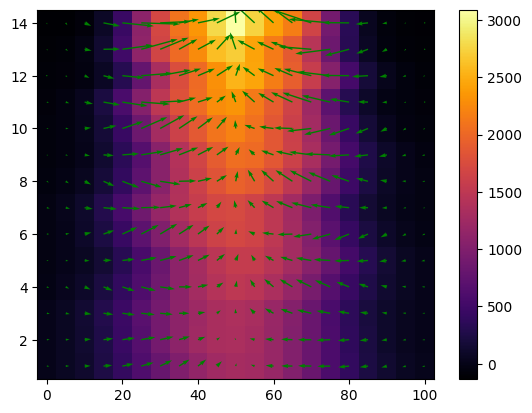

In [335]:
dz,dx = np.gradient(field_flat_square_rot)
fig, ax = plt.subplots()
plt.pcolormesh(xs, zs, field_flat_square_rot,cmap='inferno')
plt.colorbar()
# sns.heatmap(field_flat_square_rot, map='inferno')
ax.quiver(xs, zs, dx, dz, color = 'green')


Side view on the y=50 mm made in plotly

In [334]:
fig = px.scatter(field_flat, x='X', y='Z', color='B', opacity=1, color_continuous_scale='inferno')
fig.update_traces(marker={'size': 10})
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
    )
)


(21, 294)


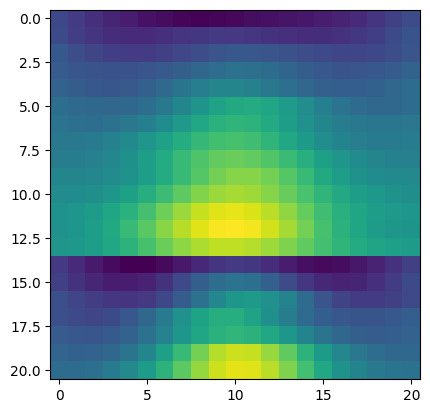

In [395]:
fields_pivoted_np = fields_df.pivot_table(index="Y", columns=["Z", "X"], values="B").to_numpy()
fields_flat = fields_pivoted_np.flatten()
print(np.shape(fields_pivoted_np))

fields_flat_part = fields_pivoted_np[:,0:21]

fields_cubed = np.reshape(fields_pivoted_np,(14,21,21))

plt.imshow(fields_cubed[0,:,:])